In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuelconsumption/FuelConsumption (1).csv


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Data Collection

In [3]:
df = pd.read_csv('/kaggle/input/fuelconsumption/FuelConsumption (1).csv')
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [4]:
# Units for the data
# ENIGINE SIZE : L
# FUEL CONSUMPTION : mile per gallon
# COEMISSION : g/km
# different types of emissions (CO2, CO, HC, NOx)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [4]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


# Data Exploration

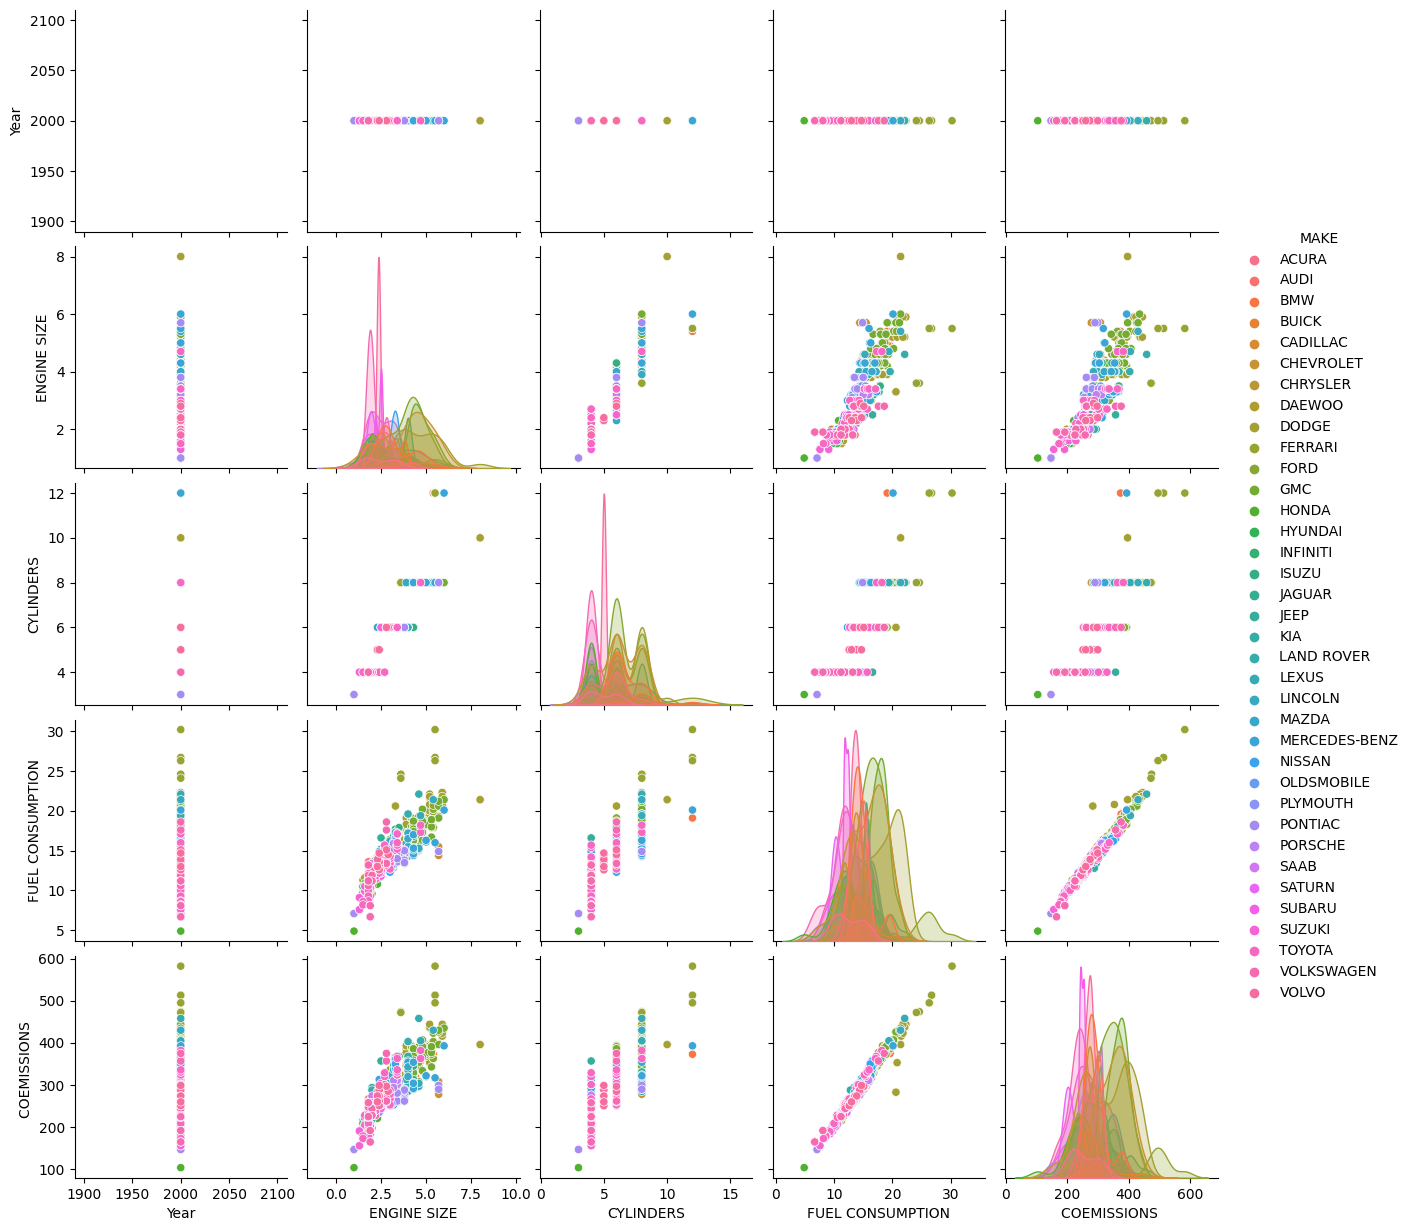

In [10]:
sns.pairplot(df, hue='MAKE')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'ENGINE SIZE'}>],
       [<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'FUEL CONSUMPTION'}>],
       [<Axes: title={'center': 'COEMISSIONS '}>, <Axes: >]], dtype=object)

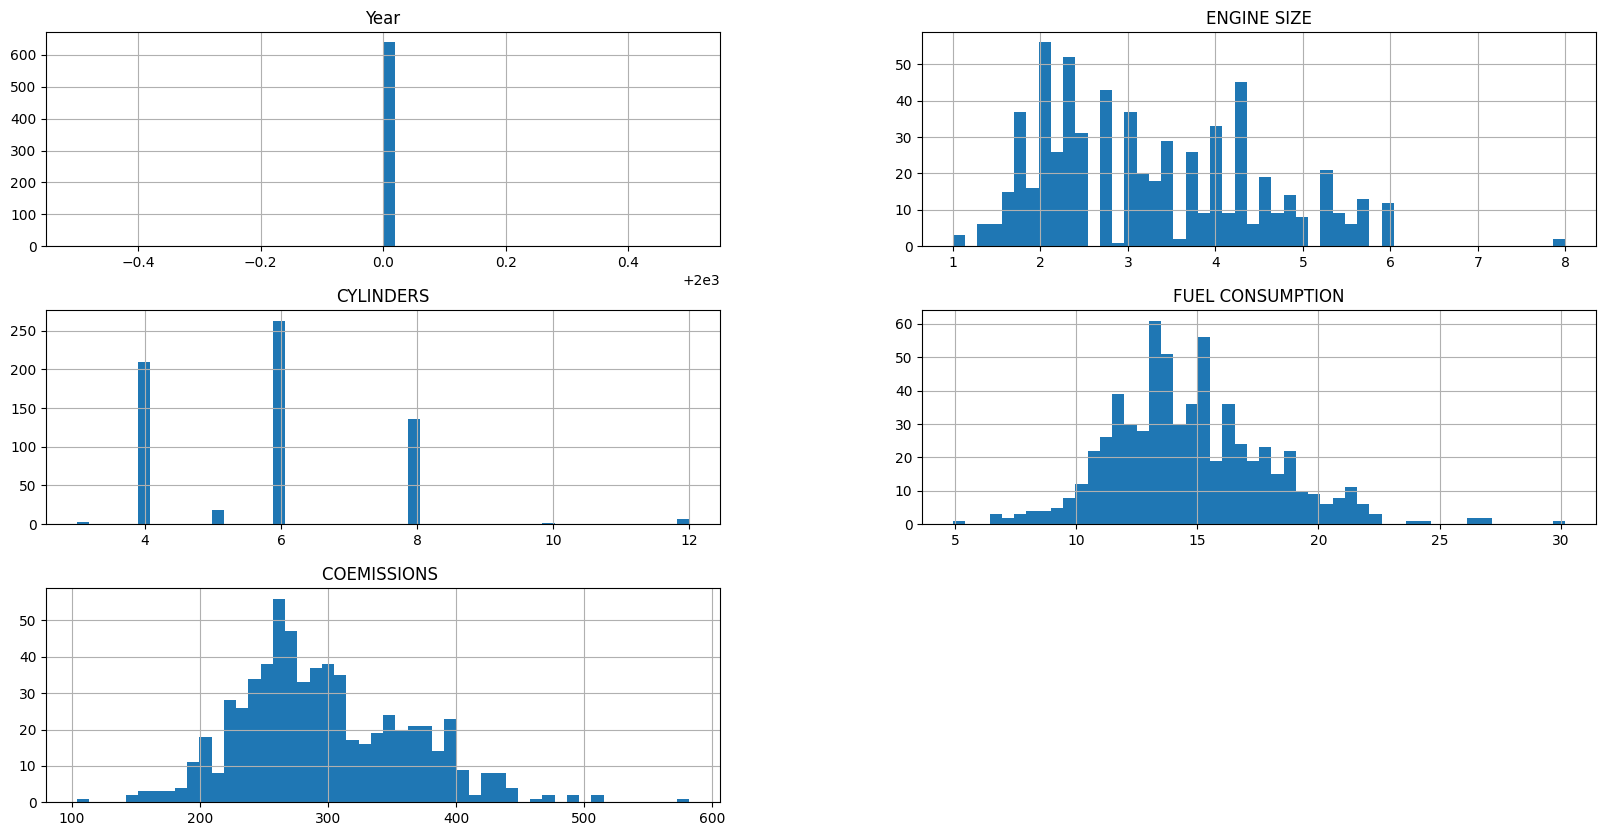

In [19]:
df.hist(figsize=(20,10),bins = 50)

<Axes: >

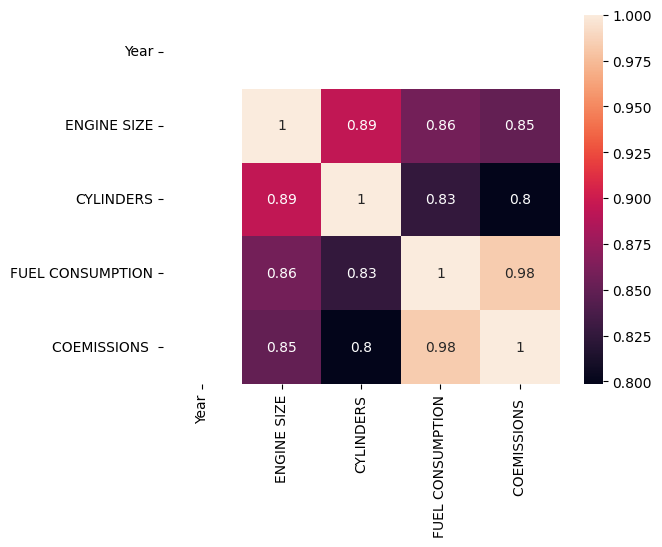

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [6]:
#Mutual Information
#Find out which parameters are highly related to fuel consumption
X = df.copy()
y = X.pop("COEMISSIONS ")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [7]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Score", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

In [8]:
mi_scores

FUEL CONSUMPTION    2.406285e+00
MODEL               1.500065e+00
ENGINE SIZE         1.212375e+00
MAKE                7.446653e-01
CYLINDERS           6.788233e-01
VEHICLE CLASS       6.648751e-01
FUEL                2.242967e-01
TRANSMISSION        2.028814e-01
Year                1.887379e-15
Name: MI Score, dtype: float64

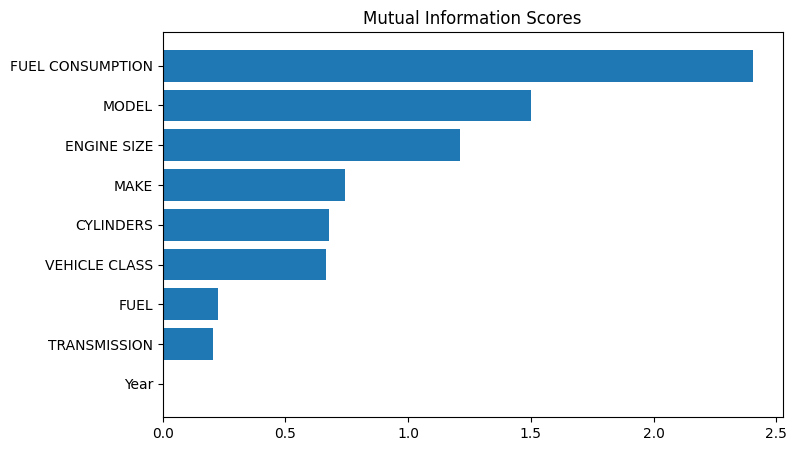

In [9]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
# Mutual Information shows that top 6 scores for predicting Co2 Emission are fuel consmption, model, engine size, make, cylinders, and vehicle class

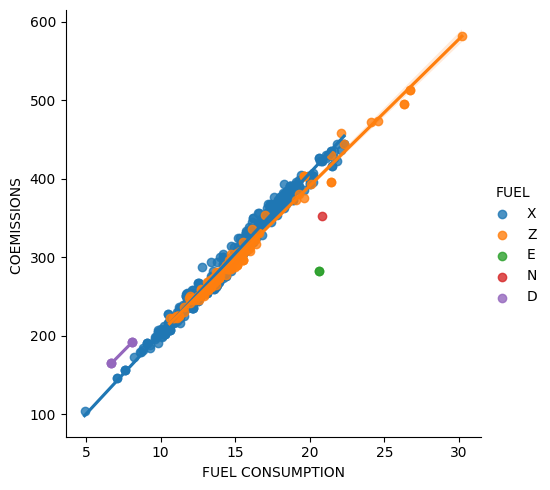

In [10]:
sns.lmplot(x="FUEL CONSUMPTION", y="COEMISSIONS ", hue="FUEL", data=df);

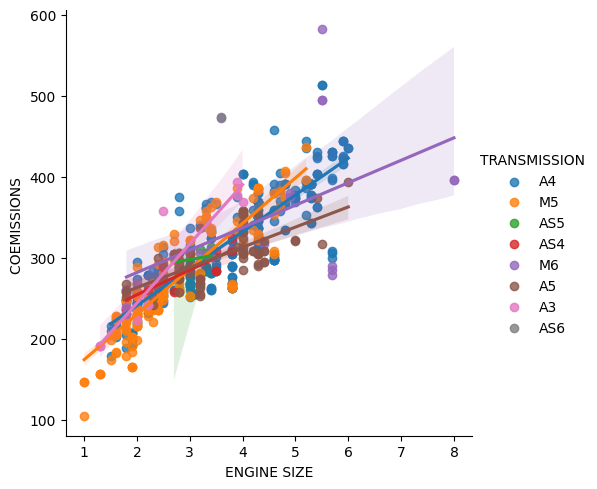

In [11]:
sns.lmplot(x="ENGINE SIZE", y="COEMISSIONS ", hue="TRANSMISSION", data=df);

<Axes: xlabel='count', ylabel='VEHICLE CLASS'>

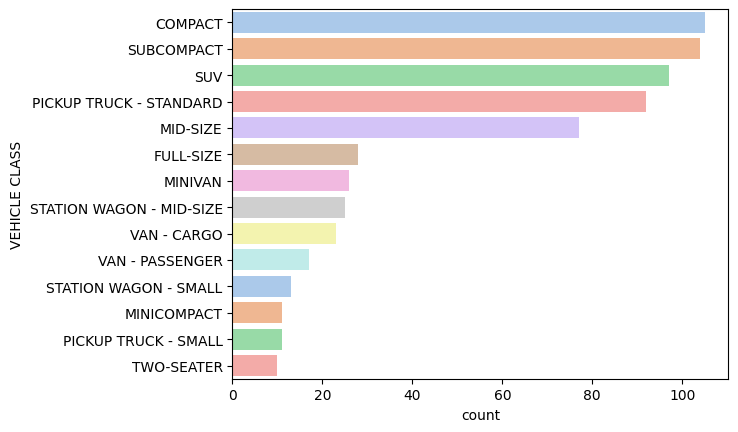

In [12]:
# Count breakdown by Vehicle Class
sns.countplot(y='VEHICLE CLASS', data=df, order=df['VEHICLE CLASS'].value_counts().index, palette='pastel')

<Axes: xlabel='CYLINDERS', ylabel='COEMISSIONS '>

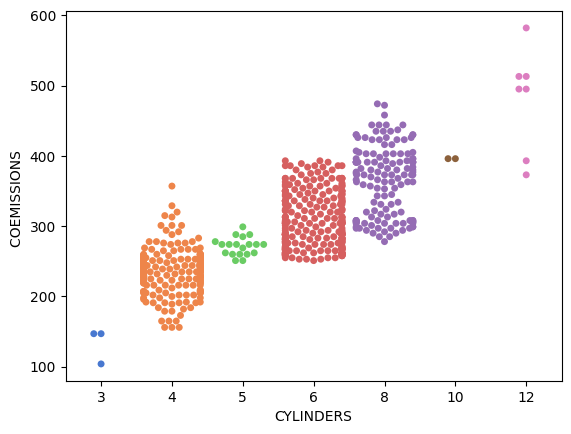

In [13]:
# Swarm plot of Fuel Consumption by Cylinder
sns.swarmplot(x='CYLINDERS', y='COEMISSIONS ', data=df, palette='muted')

# Linear Regression Model to Predict Fuel Consumption

In [14]:
#Linear regression model to predict co2 emission
#Based on correlation and mutual information findings
#Coemissions, model, engine size, make, cylinders, and vehicle class

X1 = X[['FUEL CONSUMPTION', 'ENGINE SIZE', 'CYLINDERS']]
y1 = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42) 
model = LinearRegression()
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)
test_r2_score = r2_score(y_test, test_predictions)
print("R-squared score of LR model on testing data:", test_r2_score)

R-squared score of LR model on testing data: 0.9846361749926678


In [15]:
X.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION'],
      dtype='object')

In [17]:
X2 = X[['FUEL CONSUMPTION', 'MODEL', 'ENGINE SIZE', 'MAKE', 'CYLINDERS', 'VEHICLE CLASS']]
y2 = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42) 
model = LinearRegression()
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)
test_r2_score = r2_score(y_test, test_predictions)
print("R-squared score of LR model on testing data:", test_r2_score)

R-squared score of LR model on testing data: 0.9875492830306398


In [8]:
test_r2_score

0.9857074164451897

<Axes: ylabel='COEMISSIONS '>

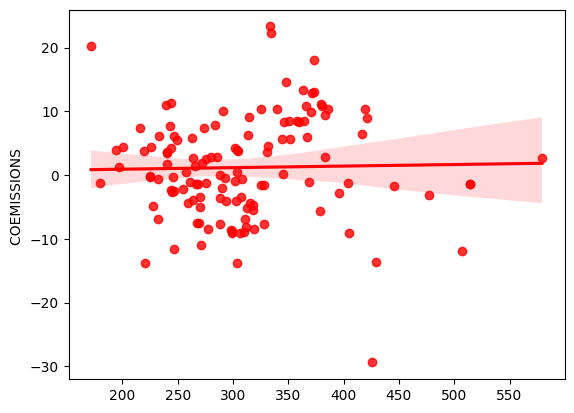

In [18]:
# residual plot
residual = (y_test - test_predictions)
sns.regplot(x = test_predictions, y = residual, data = None, scatter = True, color = 'red') 

In [ ]:
# Residual plot shows that the errors are not scattered randomly around the line 0.
# It might mean that in case with bigger size vehicles with high fuel consmption, a different model is more suitable